# Calculate wind speed vectors from the surface stress because wind speeds are only available monthly in the CESM2 single forcing experiments

In [3]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import cesm2_ensemble_members, region_names
from nemo_python_git.utils import fix_lon_range
from nemo_python_git.file_io import find_cesm2_file, find_processed_cesm2_file

In [4]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [11]:
cesm2_folder =f'{base_dir}climate-forcing/CESM2/LE2/'

Load CESM2 files:

In [12]:
# cesm2_landmask = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC.isel(time=0)
# cesm2_landmask['lon'] = fix_lon_range(cesm2_landmask['lon'])

In [17]:
taux = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h1.TAUX.18500101-18591231.nc').sel(lat=slice(-90,-50))
tauy = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h1.TAUY.18500101-18591231.nc').sel(lat=slice(-90,-50))
# ubot = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h6.U.18500101-18591231.nc')
# vbot = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h6.V.18500101-18591231.nc')
u10  = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h1.U10.18500101-18591231.nc').sel(lat=slice(-90,-50))

$\tau_x = \rho_{air} C_d u^2$

$\tau_y = \rho_{air} C_d v^2$

$\tau_x + \tau_y = (\rho_{air} C_d)(u^2 + v^2)$ $\rightarrow$ $\rho_{air} C_d = \frac{\tau_x + \tau_y}{u^2 + v^2}$

https://www2.cesm.ucar.edu/models/cesm1.0/cam/docs/description/cam5_desc.pdf#page=119.21

But, will this work when it's sea ice covered?

In [34]:
constants = (taux.TAUX + tauy.TAUY)/(u10.U10**2)
# Cd = constants/rho_air

ubot_estimate = np.sqrt(np.abs(taux.TAUX/constants))*np.sign(taux.TAUX)
vbot_estimate = np.sqrt(np.abs(tauy.TAUY/constants))*np.sign(tauy.TAUY)

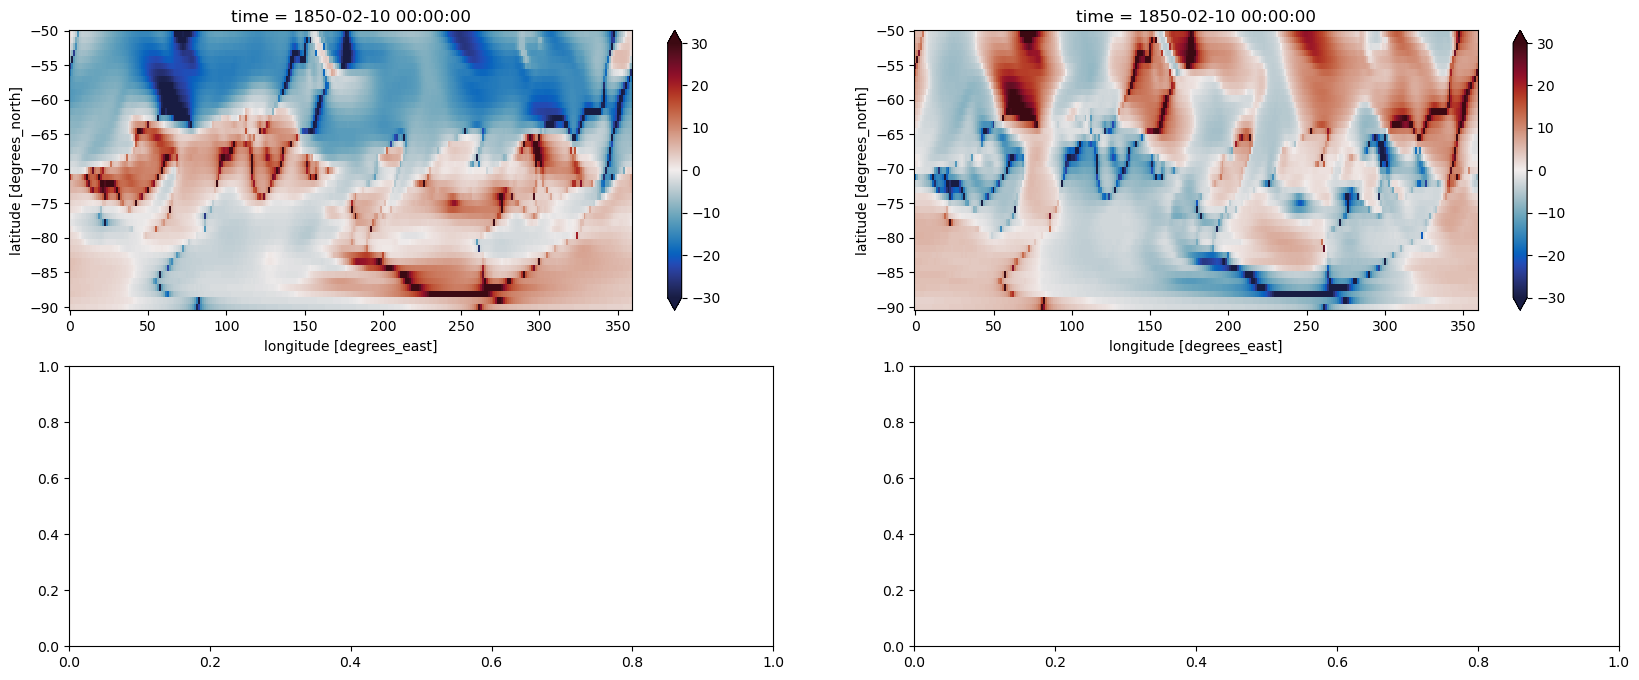

In [36]:
ts=40

fig, ax = plt.subplots(2,2, figsize=(20,8))
ubot_estimate.isel(time=ts).plot(ax=ax[0,0], vmin=-30, vmax=30, cmap=cmocean.cm.balance)
vbot_estimate.isel(time=ts).plot(ax=ax[0,1], vmin=-30, vmax=30, cmap=cmocean.cm.balance)